In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown 1JMLy-m8guLOiaYJhJTyaoLFd8d61jW8g

Downloading...
From (original): https://drive.google.com/uc?id=1JMLy-m8guLOiaYJhJTyaoLFd8d61jW8g
From (redirected): https://drive.google.com/uc?id=1JMLy-m8guLOiaYJhJTyaoLFd8d61jW8g&confirm=t&uuid=ac0be5da-3904-4489-8718-2a1479476d18
To: /content/Scene Classification-20250507T112522Z-1-001.zip
100% 264M/264M [00:05<00:00, 51.8MB/s]


In [ ]:
!unzip "/content/Scene Classification-20250507T112522Z-1-001.zip" -d/content/dataset

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Scene Classification/train/street/12323.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12203.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12327.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12375.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12392.jpg  
  inflating: /content/dataset/Scene Classification/train/street/1230.jpg  
  inflating: /content/dataset/Scene Classification/train/street/1213.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12415.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12360.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12441.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12162.jpg  
  inflating: /content/dataset/Scene Classification/train/street/12713.jpg  
  inflating: /content/dataset/Scene Cla

### 1.1 How many total images are in the dataset?

In [ ]:
# 1.no of total images :
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import pandas as pd
from collections import defaultdict

dataset_path = "/content/dataset/Scene Classification/train"
image_count = 0
valid_extensions = (".jpg", ".jpeg", ".png")

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(valid_extensions):
            image_count += 1

print("Total images:", image_count)


Total images: 14034


### 1.3 Total number of Classes in dataset

In [ ]:
# no of classes and with name
# Get all folders (classes)
import os
class_names = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Count
num_classes = len(class_names)

# Print results
print(f"Number of classes: {num_classes}")
print("Class names:")
for name in class_names:
    print(f"- {name}")

Number of classes: 6
Class names:
- glacier
- street
- sea
- mountain
- buildings
- forest


### 1.4 What is the distribution of images across different classes?

<ipython-input-6-b6814e4e1fd9>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=counts, palette="viridis")


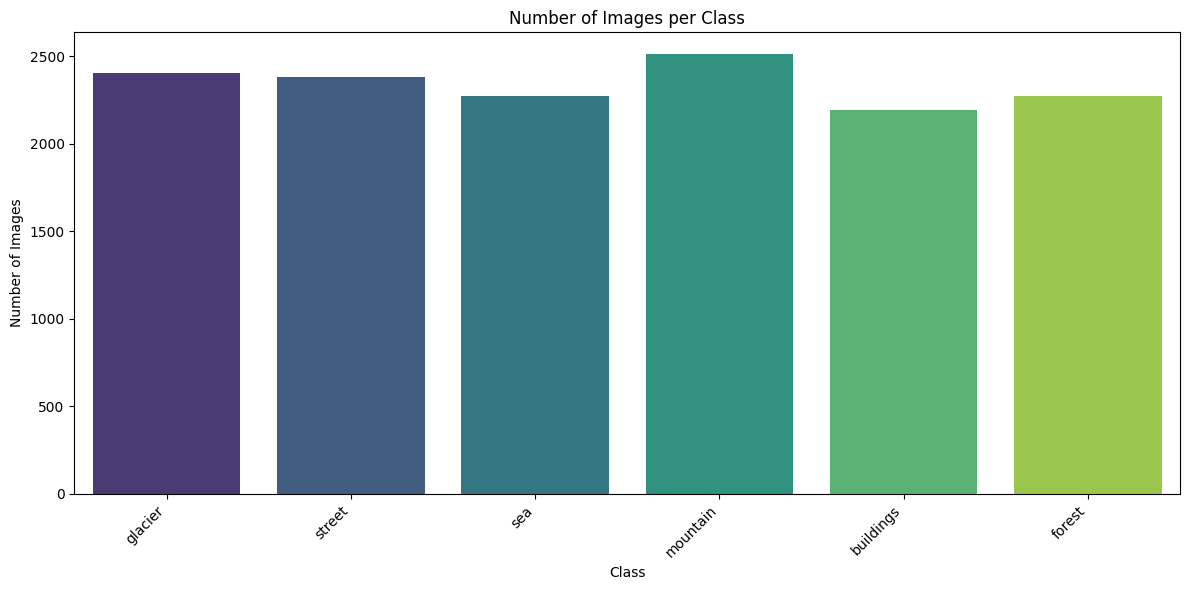

glacier: 2404 images
street: 2382 images
sea: 2274 images
mountain: 2512 images
buildings: 2191 images
forest: 2271 images


In [ ]:
# 2. no of images with each classses :
class_counts = {}

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)
    if os.path.isdir(class_path):
        count = 0
        for file in os.listdir(class_path):
            if file.lower().endswith(valid_extensions):
                count += 1
        class_counts[class_name] = count



# bar chart for class of image count
classes = list(class_counts.keys())
counts = list(class_counts.values())

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=classes, y=counts, palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.tight_layout()
plt.show()


# Print results
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

In [ ]:
import os
import shutil
import random
from pathlib import Path

# Set paths
base_path = Path("/content/dataset/Scene Classification")
train_path = base_path / "train"
val_path = base_path / "Validation"

# Split ratio
val_ratio = 0.20
valid_extensions = (".jpg", ".jpeg", ".png")

# Get class folders in Training
class_names = [folder for folder in os.listdir(train_path) if os.path.isdir(train_path / folder)]

# Create corresponding class folders in Validation
for class_name in class_names:
    (val_path / class_name).mkdir(parents=True, exist_ok=True)

# For each class, move 15% of files to Validation
for class_name in class_names:
    class_train_folder = train_path / class_name
    class_val_folder = val_path / class_name

    # List all valid image files
    all_images = [f for f in os.listdir(class_train_folder) if f.lower().endswith(valid_extensions)]
    total = len(all_images)
    val_count = int(total * val_ratio)

    # Randomly sample 15%
    val_images = random.sample(all_images, val_count)

    # Move images to validation folder
    for img in val_images:
        src = class_train_folder / img
        dst = class_val_folder / img
        shutil.move(str(src), str(dst))

    print(f"{class_name}: Moved {val_count} images to validation.")


glacier: Moved 480 images to validation.
street: Moved 476 images to validation.
sea: Moved 454 images to validation.
mountain: Moved 502 images to validation.
buildings: Moved 438 images to validation.
forest: Moved 454 images to validation.


In [ ]:
import os
from PIL import Image
from pathlib import Path

# Set your base dataset path
base_path = Path("/content/dataset/Scene Classification")
folders = ['train', 'Validation', 'test']
valid_extensions = ('.jpg', '.jpeg', '.png')

def is_image_corrupted(image_path):
    try:
        with Image.open(image_path) as img:
            img.verify()  # Verifies if an image is broken
        return False
    except Exception:
        return True

# Loop through each folder and remove corrupted images
for folder in folders:
    print(f"\nChecking corrupted images in: {folder}")
    folder_path = base_path / folder
    corrupted_count = 0

    for class_dir in folder_path.iterdir():
        if class_dir.is_dir():
            for file in class_dir.iterdir():
                if file.suffix.lower() in valid_extensions:
                    if is_image_corrupted(file):
                        print(f"Removing corrupted image: {file}")
                        corrupted_count += 1
                        file.unlink()  # Deletes the file

    print(f"Removed {corrupted_count} corrupted images from {folder}")



Checking corrupted images in: train
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/8218.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/1520.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/6195.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/1748.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/4128.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/12410.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/glacier/8283.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/street/2666.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/street/1139.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/street/3298.jpg
Removing corrupted image: /content/dataset/Scene Classification/train/street/15154.jpg
Removing

In [ ]:
import os
from PIL import Image
from collections import defaultdict
from pathlib import Path

# Set base directory
base_path = Path("/content/dataset/Scene Classification")
folders = ['train', 'Validation', 'test']  # Adjust if your structure is different
valid_extensions = ('.jpg', '.jpeg', '.png')

# Dictionary to store image sizes
size_count = defaultdict(int)

# Go through each folder
for folder in folders:
    print(f"\nChecking image sizes in: {folder}")
    folder_path = base_path / folder
    total_images = 0

    for class_name in os.listdir(folder_path):
        class_path = folder_path / class_name
        if not class_path.is_dir():
            continue

        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(valid_extensions):
                try:
                    img_path = class_path / img_name
                    with Image.open(img_path) as img:
                        size = img.size  # (width, height)
                        size_count[size] += 1
                        total_images += 1
                except Exception as e:
                    print(f"Could not read {img_path}: {e}")

    print(f"Total images in {folder}: {total_images}")
    print("Image size distribution:")
    for size, count in size_count.items():
        print(f" - Size {size}: {count} images")

    # Clear size count for next folder
    size_count.clear()



Checking image sizes in: train
Total images in train: 11195
Image size distribution:
 - Size (150, 150): 11160 images
 - Size (150, 110): 1 images
 - Size (150, 111): 2 images
 - Size (150, 149): 1 images
 - Size (150, 143): 2 images
 - Size (150, 97): 1 images
 - Size (150, 123): 2 images
 - Size (150, 120): 1 images
 - Size (150, 76): 1 images
 - Size (150, 135): 2 images
 - Size (150, 134): 1 images
 - Size (150, 113): 6 images
 - Size (150, 140): 1 images
 - Size (150, 100): 1 images
 - Size (150, 81): 1 images
 - Size (150, 146): 1 images
 - Size (150, 142): 1 images
 - Size (150, 144): 2 images
 - Size (150, 103): 1 images
 - Size (150, 141): 1 images
 - Size (150, 136): 2 images
 - Size (150, 131): 1 images
 - Size (150, 124): 1 images
 - Size (150, 108): 1 images
 - Size (150, 115): 1 images

Checking image sizes in: Validation
Total images in Validation: 2797
Image size distribution:
 - Size (150, 150): 2784 images
 - Size (150, 111): 1 images
 - Size (150, 146): 1 images
 - 

In [ ]:
from PIL import Image, UnidentifiedImageError
import os
from pathlib import Path

# Set base directory
base_path = Path("/content/dataset/Scene Classification")
folders = ['train', 'Validation', 'test']  # Adjust if your structure is different
valid_extensions = ('.jpg', '.jpeg', '.png')

total_images = 0
square_images = 0
non_square_images = 0

for folder in folders:
    folder_path = base_path / folder
    print(f"\nChecking image sizes in: {folder_path}")

    for class_dir in os.listdir(folder_path):
        class_path = folder_path / class_dir
        if not class_path.is_dir():
            continue

        for image_name in os.listdir(class_path):
            if image_name.lower().endswith(valid_extensions):
                image_path = class_path / image_name
                try:
                    with Image.open(image_path) as img:
                        width, height = img.size
                        total_images += 1
                        if width == height:
                            square_images += 1
                        else:
                            non_square_images += 1
                except UnidentifiedImageError:
                    print(f" Corrupted: {image_path}")
                except Exception as e:
                    print(f" Error: {e} -> {image_path}")

print(f"\n Image Size Summary:")
print(f"- Total images checked: {total_images}")
print(f"- Square (likely cropped): {square_images}")
print(f"- Non-square (not cropped): {non_square_images}")



Checking image sizes in: /content/dataset/Scene Classification/train

Checking image sizes in: /content/dataset/Scene Classification/Validation

Checking image sizes in: /content/dataset/Scene Classification/test

 Image Size Summary:
- Total images checked: 16992
- Square (likely cropped): 16937
- Non-square (not cropped): 55


In [ ]:
from PIL import Image, UnidentifiedImageError
import os
from pathlib import Path

base_path = Path("/content/dataset/Scene Classification")
folders = ['train', 'Validation', 'test']  # Adjust if your structure is different
target_size = (150, 150)
valid_extensions = (".jpg", ".jpeg", ".png")

corrupted_files = []

for folder in folders:
    folder_path = base_path / folder
    print(f"\nResizing images in: {folder_path}")

    for class_dir in os.listdir(folder_path):
        class_path = folder_path / class_dir
        if not class_path.is_dir():
            continue

        for image_name in os.listdir(class_path):
            if image_name.lower().endswith(valid_extensions):
                image_path = class_path / image_name
                try:
                    with Image.open(image_path) as img:
                        if img.mode != 'RGB':
                            img = img.convert('RGB')
                        img_resized = img.resize(target_size)
                        img_resized.save(image_path)
                except UnidentifiedImageError:
                    print(f" Corrupted or unreadable: {image_path}")
                    corrupted_files.append(str(image_path))
                except Exception as e:
                    print(f" Error processing {image_path}: {e}")

print("\n Resizing completed.")
if corrupted_files:
    print(f"\n {len(corrupted_files)} corrupted files skipped:")
    for file in corrupted_files:
        print(f"- {file}")



Resizing images in: /content/dataset/Scene Classification/train

Resizing images in: /content/dataset/Scene Classification/Validation

Resizing images in: /content/dataset/Scene Classification/test

 Resizing completed.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths to the directories containing your training and validation images
train_dir = '/content/dataset/Scene Classification/train'
validation_dir = '/content/dataset/Scene Classification/Validation'

# 1. Initialize ImageDataGenerator for normalizing pixel values to range [0, 1]
train_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize the pixel values to [0, 1] by dividing by 255
)

validation_datagen = ImageDataGenerator(
    rescale=1./255  # Normalize the pixel values to [0, 1] by dividing by 255
)

# 2. Flow images from directories with specified target size and batch size
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,           # Batch size
    class_mode='categorical',  # For multi-class classification (use 'binary' for binary classification)
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),  # Resize images to 256x256 (optional)
    batch_size=32,           # Batch size
    class_mode='categorical',  # For multi-class classification (use 'binary' for binary classification)
    shuffle=False
)


Found 11195 images belonging to 6 classes.
Found 2797 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augmentation only for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.9, 1.1],
    validation_split=0.15
)

# Training generator (augments images in real-time)
train_generator = train_datagen.flow_from_directory(
    directory='/content/dataset/Scene Classification/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 9519 images belonging to 6 classes.


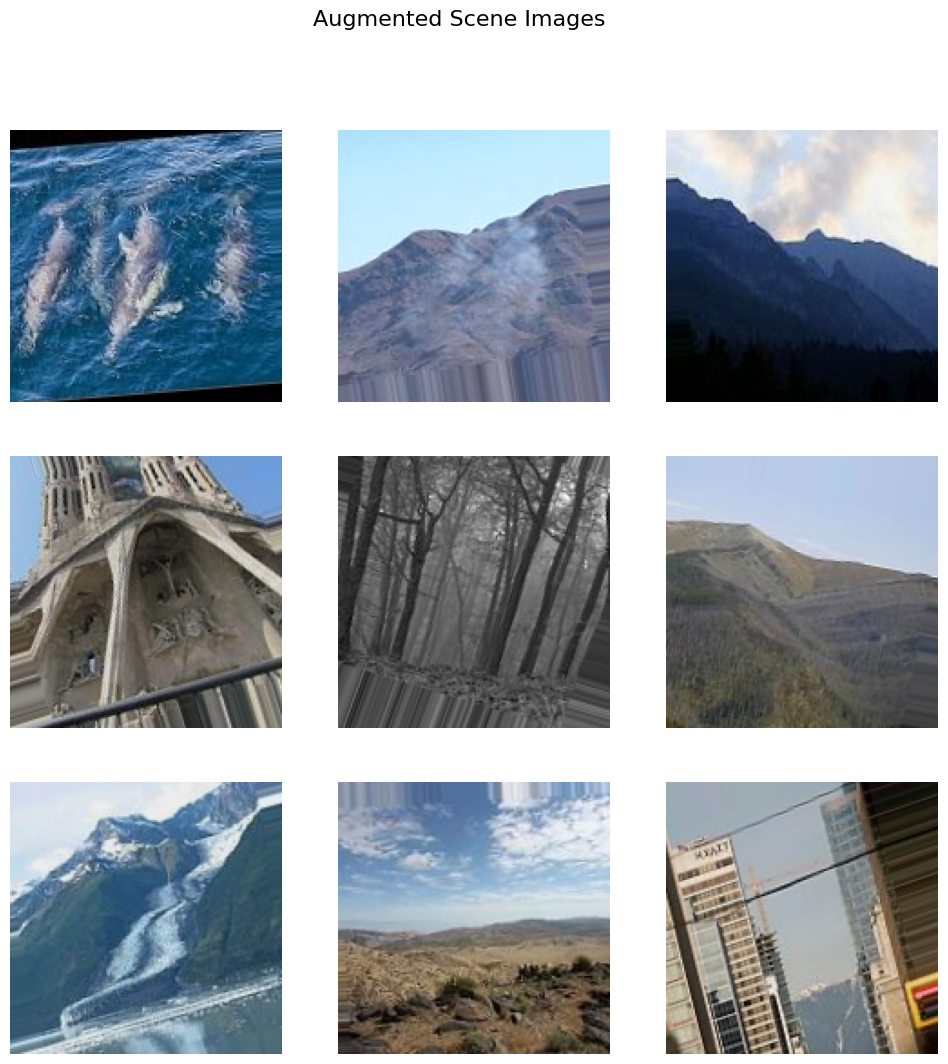

In [ ]:
import matplotlib.pyplot as plt

# Generate augmented images
images, _ = next(train_generator)

# Plot 9 samples
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.suptitle('Augmented Scene Images', fontsize=16)
plt.show()

# 2 Design, Train, and Evaluate a Baseline Model

### 1. Model Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 20

#  Data Generators (With On-the-Fly Augmentation for Training)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    # zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset/Scene Classification/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
   '/content/dataset/Scene Classification/Validation',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 11195 images belonging to 6 classes.
Found 2797 images belonging to 6 classes.


In [ ]:
# 2 Model Architecture (No Dropout, Basic CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(NUM_CLASSES, activation='softmax')  # For multi-class classification
])

model.compile(
    optimizer=SGD(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,836,998 (18.45 MB)

 Trainable params: 4,836,998 (18.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 3. Train the Model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS
)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 88s 248ms/step - accuracy: 0.3304 - loss: 1.6238 - val_accuracy: 0.5170 - val_loss: 1.2653
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 83s 238ms/step - accuracy: 0.5395 - loss: 1.1764 - val_accuracy: 0.5720 - val_loss: 1.1065
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 84s 241ms/step - accuracy: 0.5888 - loss: 1.0326 - val_accuracy: 0.5921 - val_loss: 1.0780
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 84s 240ms/step - accuracy: 0.6069 - loss: 0.9965 - val_accuracy: 0.6364 - val_loss: 0.9512
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 84s 239ms/step - accuracy: 0.6342 - loss: 0.9362 - val_accuracy: 0.6239 - val_loss: 1.0387
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 87s 249ms/step - accuracy: 0.6519 - loss: 0.9051 - val_accuracy: 0.6904 - val_loss: 0.8282
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 84s 239ms/step - accuracy: 0.6624 - loss: 0.8749 - val_accuracy: 0.7036 - val_loss: 0.7985
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 83s 236ms/step - accuracy: 0.6806 - loss: 0

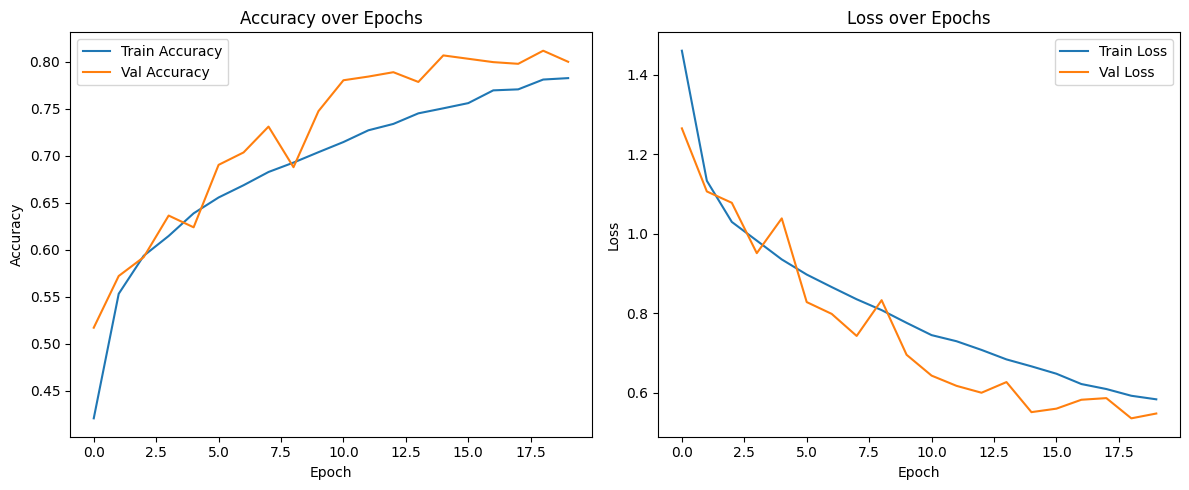

In [ ]:
# 4️ Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on validation set
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Ground truth
y_true = validation_generator.classes

# Class names
class_names = list(validation_generator.class_indices.keys())

# Evaluation metrics
print(classification_report(y_true, y_pred, target_names=class_names))


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step
              precision    recall  f1-score   support

   buildings       0.68      0.89      0.77       438
      forest       0.94      0.94      0.94       451
     glacier       0.82      0.72      0.77       480
    mountain       0.91      0.60      0.72       500
         sea       0.67      0.87      0.76       453
      street       0.88      0.81      0.84       475

    accuracy                           0.80      2797
   macro avg       0.82      0.80      0.80      2797
weighted avg       0.82      0.80      0.80      2797



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 731ms/step


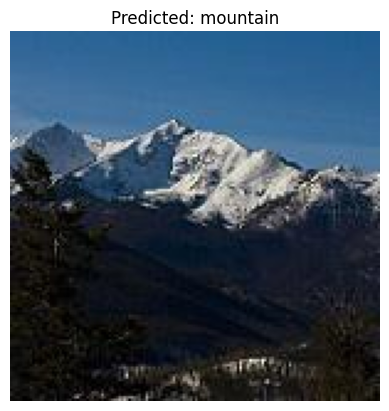

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Load a sample image
img_path = "/content/dataset/Scene Classification/test/mountain/21618.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalization
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

# Display
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
# 5️ Evaluate and Print Classification Report
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step
Classification Report:

              precision    recall  f1-score   support

   buildings       0.68      0.89      0.77       438
      forest       0.94      0.94      0.94       451
     glacier       0.82      0.72      0.77       480
    mountain       0.91      0.60      0.72       500
         sea       0.67      0.87      0.76       453
      street       0.88      0.81      0.84       475

    accuracy                           0.80      2797
   macro avg       0.82      0.80      0.80      2797
weighted avg       0.82      0.80      0.80      2797



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


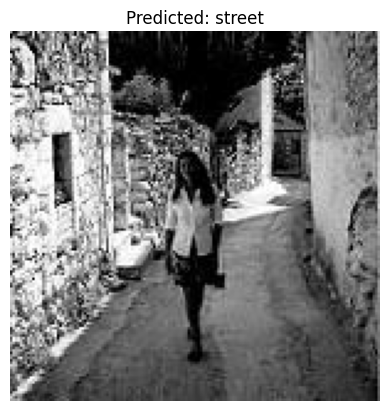

In [ ]:
from tensorflow.keras.preprocessing import image

#  Sample Inference
img_path = "/content/dataset/Scene Classification/test/street/20088.jpg"
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = class_labels[np.argmax(prediction)]

# Show result
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "/content/dataset/Scene Classification/test"

# Use only rescaling for test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # use same size as used in training
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 3000 images belonging to 6 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

 1/94 ━━━━━━━━━━━━━━━━━━━━ 6s 72ms/step - accuracy: 0.8750 - loss: 0.3016

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8322 - loss: 0.4789
Test Accuracy: 0.7860000133514404


# Design, Train , and Evaluate Deeper Architecture with Regularization Layer

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Paths
train_dir = '/content/dataset/Scene Classification/train'
validation_dir = '/content/dataset/Scene Classification/Validation'
test_dir = '/content/dataset/Scene Classification/test'

# Parameters
IMG_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 6
EPOCHS = 30

# Data Generators with augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.9, 1.1]  # Added brightness adjustment
)

# Validation and Test generators (no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

class_names = list(train_generator.class_indices.keys())



Found 11195 images belonging to 6 classes.
Found 2797 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Set the number of classes in your classification problem
NUM_CLASSES = 6  # Adjust this value according to your dataset

# New deeper architecture with added regularization and batch normalization
deeper_model = Sequential([
    # Conv Layer 1
    Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Conv Layer 2
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Conv Layer 3
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Conv Layer 4 (additional)
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Conv Layer 5 (additional)
    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),

    # Flatten and Dense Layers
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')  # Output layer for multi-class classification
])

# Compile the deeper model with SGD optimizer
deeper_model.compile(
    optimizer=SGD(),  # You can also try Adam optimizer later if needed
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show the model summary to check the architecture
deeper_model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 74, 74, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 36, 36, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 36, 36, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 34, 34, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 17, 17, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 15, 15, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 7, 7, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 5, 5, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 2, 2, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 2, 2, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,509,062 (32.46 MB)

 Trainable params: 8,505,094 (32.44 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [ ]:
# Importing necessary libraries
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate scheduler: Reduce learning rate when validation loss plateaus
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

# Train the deeper model with SGD, early stopping, and learning rate scheduler
history_sgd = deeper_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 100s 271ms/step - accuracy: 0.4043 - loss: 1.9129 - val_accuracy: 0.3918 - val_loss: 1.3867 - learning_rate: 0.0100
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 93s 264ms/step - accuracy: 0.5553 - loss: 1.1191 - val_accuracy: 0.6511 - val_loss: 0.9021 - learning_rate: 0.0100
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 88s 251ms/step - accuracy: 0.6313 - loss: 0.9813 - val_accuracy: 0.3654 - val_loss: 2.4854 - learning_rate: 0.0100
Epoch 4/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 89s 255ms/step - accuracy: 0.6649 - loss: 0.8780 - val_accuracy: 0.6514 - val_loss: 0.9621 - learning_rate: 0.0100
Epoch 5/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 89s 254ms/step - accuracy: 0.6971 - loss: 0.8097 - val_accuracy: 0.6936 - val_loss: 0.7737 - learning_rate: 0.0100
Epoch 6/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 90s 257ms/step - accuracy: 0.7102 - loss: 0.7801 - val_accuracy: 0.7537 - val_loss: 0.7117 - learning_rate: 0.0100
Epoch 7/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 93s 267ms/step - accuracy: 0.

94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step
Classification Report:
              precision    recall  f1-score   support

   buildings       0.93      0.73      0.82       437
      forest       0.81      0.99      0.89       474
     glacier       0.91      0.42      0.57       553
    mountain       0.73      0.82      0.77       525
         sea       0.65      0.92      0.76       510
      street       0.82      0.85      0.84       501

    accuracy                           0.78      3000
   macro avg       0.81      0.79      0.77      3000
weighted avg       0.81      0.78      0.77      3000



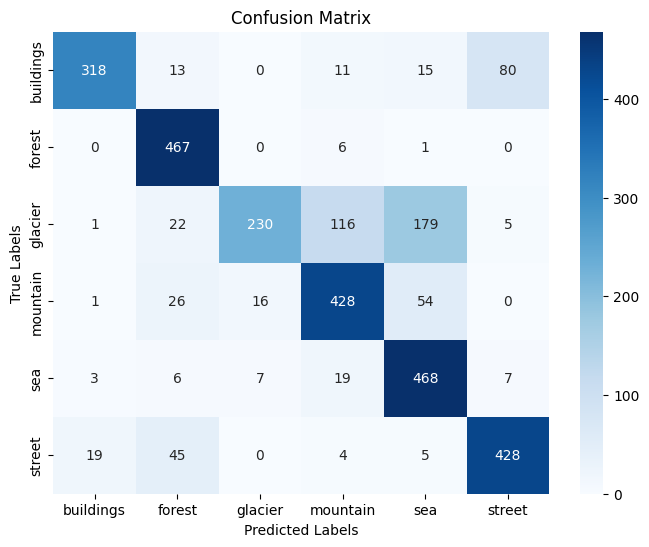

In [ ]:
# Plotting the training and validation accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_deeper.history['accuracy'], label='Train Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_deeper.history['loss'], label='Train Loss')
plt.plot(history_deeper.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_acc = deeper_model.evaluate(test_generator, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

# Make predictions on the test set
test_predictions = deeper_model.predict(test_generator, verbose=2)
y_pred = np.argmax(test_predictions, axis=1)
y_true = test_generator.classes

# Generate classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

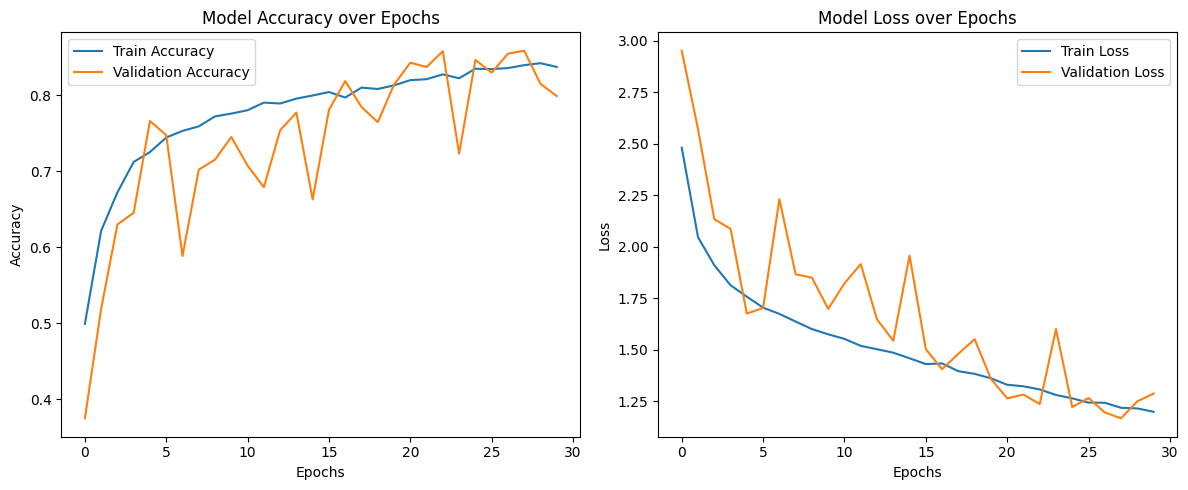

In [ ]:
# Plot accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_deeper.history['accuracy'], label='Train Accuracy')
plt.plot(history_deeper.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_deeper.history['loss'], label='Train Loss')
plt.plot(history_deeper.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Optimizer Analysis (SGD vs Adam)

In [ ]:
# Recompile the deeper model with Adam optimizer
deeper_model.compile(
    optimizer=Adam(),  # Switch to Adam optimizer
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train with Adam optimizer
history_deeper_adam = deeper_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS
)

# Plotting the comparison of optimizers
plt.plot(history_deeper.history['loss'], label='Deeper Model with SGD')
plt.plot(history_deeper_adam.history['loss'], label='Deeper Model with Adam')
plt.title('Optimizer Comparison: SGD vs Adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation: Performance Metrics

In [ ]:
from sklearn.metrics import classification_report

# Get predictions on the validation set for both models
baseline_preds = baseline_model.predict(validation_generator)
deeper_preds = deeper_model.predict(validation_generator)

# Convert predictions to class labels
baseline_preds = np.argmax(baseline_preds, axis=1)
deeper_preds = np.argmax(deeper_preds, axis=1)

# Ground truth labels
y_true = validation_generator.classes

# Classification Report for Baseline Model
print("Classification Report for Baseline Model")
print(classification_report(y_true, baseline_preds))

# Classification Report for Deeper Model
print("Classification Report for Deeper Model")
print(classification_report(y_true, deeper_preds))


# Inferences on Sample Images

In [ ]:
# Inference on sample image
import numpy as np
from tensorflow.keras.preprocessing import image

# Load sample image
img_path = '/path_to_sample_image.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Normalize image
img_array /= 255.0

# Predict using the baseline model
baseline_pred = baseline_model.predict(img_array)
deeper_pred = deeper_model.predict(img_array)

# Show predictions
print(f"Baseline model prediction: {np.argmax(baseline_pred)}")
print(f"Deeper model prediction: {np.argmax(deeper_pred)}")
